In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
# colums value
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
]

In [35]:
## Load Data
# Type your Loan.csv path
file_path = 'Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [36]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists
if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop('RiskScore', axis=1)

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalAssets TotalLiabilities  MonthlyIncome  JobTenure  NetWorth  \
0       146111            19183    3329.00000

In [37]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved]
Index: []

[0 rows x 34 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           0
HomeOwner

In [38]:
num_rows = df.shape[0]
print(f"Number of rows before cleaning: {num_rows}")

# Select categorical columns
categorical_columns_df = df.select_dtypes(exclude=['number'])

# Select only numeric columns for outlier removal
numeric_columns_df = df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_columns_df.quantile(0.25)
Q3 = numeric_columns_df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from numeric data by applying the bounds per column
cleaned_numeric_df = numeric_columns_df.apply(lambda x: (x >= lower_bound[x.name]) & (x <= upper_bound[x.name]))

# Only keep rows where no column is out of bounds
cleaned_numeric_df = numeric_columns_df[cleaned_numeric_df.all(axis=1)]

num_rows = cleaned_numeric_df.shape[0]
print(f"Number of rows after cleaning: {num_rows}")

Number of rows before cleaning: 20000
Number of rows after cleaning: 9966


In [39]:
# Join cleaned numeric data with categorical columns
df = cleaned_numeric_df.join(categorical_columns_df, how='left')

LoanApproved
0    7775
1    2191
Name: count, dtype: int64

LoanApproved
0    78.015252
1    21.984748
Name: count, dtype: float64


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalDebtToIncomeRatio,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PaymentHistory,LoanApproved
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,0.389852,2018-01-02,Employed,Associate,Single,Mortgage,0,Debt Consolidation,21,0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,0.313098,2018-01-04,Employed,High School,Single,Mortgage,0,Home,27,0
6,58,51250,564,39,12741,48,0,337,0.367380,6,...,0.170529,2018-01-07,Employed,High School,Married,Rent,0,Other,21,0
7,49,97345,516,23,19634,12,5,288,0.209768,5,...,0.260767,2018-01-08,Employed,High School,Divorced,Mortgage,0,Other,19,1
12,42,74453,573,21,16154,60,1,258,0.527488,6,...,0.118873,2018-01-13,Employed,Bachelor,Married,Rent,0,Debt Consolidation,26,0


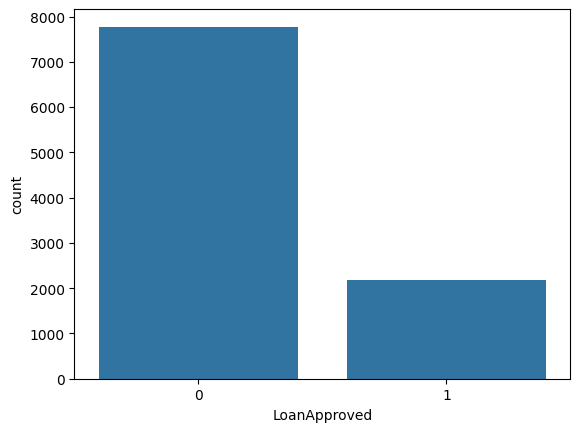

In [40]:
import seaborn as sns

print(df['LoanApproved'].value_counts())
print()
print((df['LoanApproved'].value_counts() / df['LoanApproved'].value_counts().sum()) * 100)

sns.countplot(data=df, x='LoanApproved')
df.head()

In [41]:
# Target column is 'LoanApproved'
# One-Hot Encoding for categorical columns
attr = pd.get_dummies(df[categorical_columns + numeric_columns], drop_first=True)
  # Features (all columns except the target)
target = df['LoanApproved']  # Target variable

# Split data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(
    attr, target, test_size=0.25, random_state=44, shuffle=True
)

# Inspect the splits
print("Training Features Shape:", attr_train.shape)
print("Testing Features Shape:", attr_test.shape)
print("Training Target Shape:", target_train.shape)
print("Testing Target Shape:", target_test.shape)

# Optional: Display summaries
print("Training Data Summary:\n", attr_train.describe())
print("Testing Data Summary:\n", attr_test.describe())

Training Features Shape: (7474, 80)
Testing Features Shape: (2492, 80)
Training Target Shape: (7474,)
Testing Target Shape: (2492,)
Training Data Summary:
                Age   AnnualIncome  CreditScore   Experience    LoanAmount  \
count  7474.000000    7474.000000  7474.000000  7474.000000   7474.000000   
mean     39.580546   54262.661359   574.402194    17.331951  22395.094996   
std      11.254201   27928.463608    47.466764    10.989207   9775.108683   
min      18.000000   15000.000000   437.000000     0.000000   3729.000000   
25%      32.000000   32499.500000   544.000000     9.000000  15085.500000   
50%      39.000000   48281.000000   580.000000    17.000000  20720.000000   
75%      47.000000   70567.000000   609.000000    25.000000  28096.750000   
max      72.000000  137278.000000   696.000000    49.000000  53707.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count   7474.000000         7474.000000          7474.000000   
mean      55.091785   

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB.fit(attr_train, target_train)
target_pred = GNB.predict(attr_test)
accuracy = accuracy_score(target_test,target_pred ) 
print(f'Accuracy of model {accuracy}%')
print('')

# Import metrics to compute accuracy
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy of model 0.8788121990369181%

Model accuracy score with default hyperparameters: 0.8788

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1941
           1       0.73      0.71      0.72       551

    accuracy                           0.88      2492
   macro avg       0.83      0.82      0.82      2492
weighted avg       0.88      0.88      0.88      2492


Confusion Matrix
[[1797  144]
 [ 158  393]]


In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MNB = MultinomialNB()
MNB.fit(attr_train, target_train)
target_pred = MNB.predict(attr_test)
accuracy = accuracy_score(target_test,target_pred ) 
print(f'Accuracy of model {accuracy}%')
print('')

# Import metrics to compute accuracy
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# Compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, target_pred)))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))

Accuracy of model 0.776083467094703%

Model accuracy score with default hyperparameters: 0.7761

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      1941
           1       0.50      0.78      0.61       551

    accuracy                           0.78      2492
   macro avg       0.71      0.78      0.72      2492
weighted avg       0.83      0.78      0.79      2492


Confusion Matrix
[[1505  436]
 [ 122  429]]
